In [104]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Markdown
import seaborn as sns

In [115]:
data_inactivity = pd.read_csv('inactivity.csv', usecols=['FIPS', '% INACTIVE']) #FIPDS
data_obesity = pd.read_csv('obesity.csv', usecols=['FIPS', '% OBESE'])
data_diabetes = pd.read_csv('diabetes.csv', usecols=['FIPS', '% DIABETIC',])

inac_ob = pd.merge(data_inactivity, data_obesity, on='FIPS', how='inner')

dataset = pd.merge(inac_ob, data_diabetes, on='FIPS', how='inner')

len(dataset)

font_size_text = "<h2>**5 Point Summary**</h2>"
display(Markdown(font_size_text))

dataset

<h2>**5 Point Summary**</h2>

,FIPS,% INACTIVE,% OBESE,% DIABETIC
0,1011,17.0,18.7,9.4
1,2068,16.2,18.9,6.8
2,2105,15.0,19.4,7.3
3,2195,17.8,17.2,9.2
4,2230,15.8,18.3,6.6
...,...,...,...,...
349,51820,16.6,19.5,8.6
350,51830,15.7,18.0,8.5
351,51840,16.1,19.4,6.9
352,53055,11.9,19.3,4.5


In [116]:
#Check if data is normal
from scipy.stats import shapiro
from scipy.stats import boxcox

# Assuming 'inactivity_percentage' is the column of interest
data1 = data_inactivity[ '% INACTIVE']
data2 = data_obesity[ '% OBESE']
data3 = data_diabetes[ '% DIABETIC']

# Shapiro-Wilk test for normality
stat, p_value = shapiro(data3)
print(p_value)
# Check the p-value
if p_value > 0.05:
    print("The data appears to be normally distributed.")
else:
    print("The data does not appear to be normally distributed.")

1.348526384579359e-33
The data does not appear to be normally distributed.


In [117]:
obes_data = data_obesity.iloc[:, 1].values #All rows, 1st column 
diab_data = data_diabetes.iloc[:, 1].values #All rows, 1st column 
inac_data = data_inactivity.iloc[:, 1].values #All rows, 1st column 

In [118]:
q1_inac = np.percentile(inac_data, 25)
q1_obes = np.percentile(obes_data, 25)
q1_diab = np.percentile(diab_data, 25)

median_inac = np.percentile(inac_data, 50)
median_obes = np.percentile(obes_data, 50)
median_diab = np.percentile(diab_data, 50)

q3_inac = np.percentile(inac_data, 75)
q3_obes = np.percentile(obes_data, 75)
q3_diab = np.percentile(diab_data, 75)

iqr_inac = q3_inac - q1_inac
iqr_obes = q3_obes - q1_obes
iqr_diab = q3_diab - q1_diab

lower_bound_inac = q1_inac - 1.5 * iqr_inac
lower_bound_obes = q1_obes - 1.5 * iqr_obes
lower_bound_diab = q1_diab - 1.5 * iqr_diab

upper_bound_inac = q1_inac + 1.5 * iqr_inac
upper_bound_obes = q1_obes + 1.5 * iqr_obes
upper_bound_diab = q1_diab + 1.5 * iqr_diab

for i in ["inac","obes", "diab"]:
    print('\n')
    print("First Quartile for " + i + "\t :", locals()[f"q1_{i}"])
    print("Median for " + i + "\t :", locals()[f"median_{i}"])
    print("Third Quartile for " + i+ "\t :", locals()[f"q3_{i}"])
    print("IQR for " + i+ "\t :", locals()[f"iqr_{i}"])
    print("Lowerbound for " + i+ "\t :", locals()[f"lower_bound_{i}"])
    print("Upper bound for " + i+ "\t :", locals()[f"upper_bound_{i}"])

# outliers = (data < lower_bound) | (data > upper_bound)
# filtered_inactivity_data = data[~outliers]
# This code calculates the five-number summary, computes the IQR, and filters out potential outliers based on a chosen threshold (in this case, 1.5 times the IQR). Adjust the threshold as needed based on the characteristics of your data and your goals for outlier removal.





First Quartile for inac	 : 15.0
Median for inac	 : 16.7
Third Quartile for inac	 : 18.1
IQR for inac	 : 3.1000000000000014
Lowerbound for inac	 : 10.349999999999998
Upper bound for inac	 : 19.650000000000002


First Quartile for obes	 : 17.9
Median for obes	 : 18.3
Third Quartile for obes	 : 19.0
IQR for obes	 : 1.1000000000000014
Lowerbound for obes	 : 16.249999999999996
Upper bound for obes	 : 19.55


First Quartile for diab	 : 7.3
Median for diab	 : 8.4
Third Quartile for diab	 : 9.7
IQR for diab	 : 2.3999999999999995
Lowerbound for diab	 : 3.7000000000000006
Upper bound for diab	 : 10.899999999999999


/Users/snehsuresh/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/snehsuresh/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/snehsuresh/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/snehsuresh/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

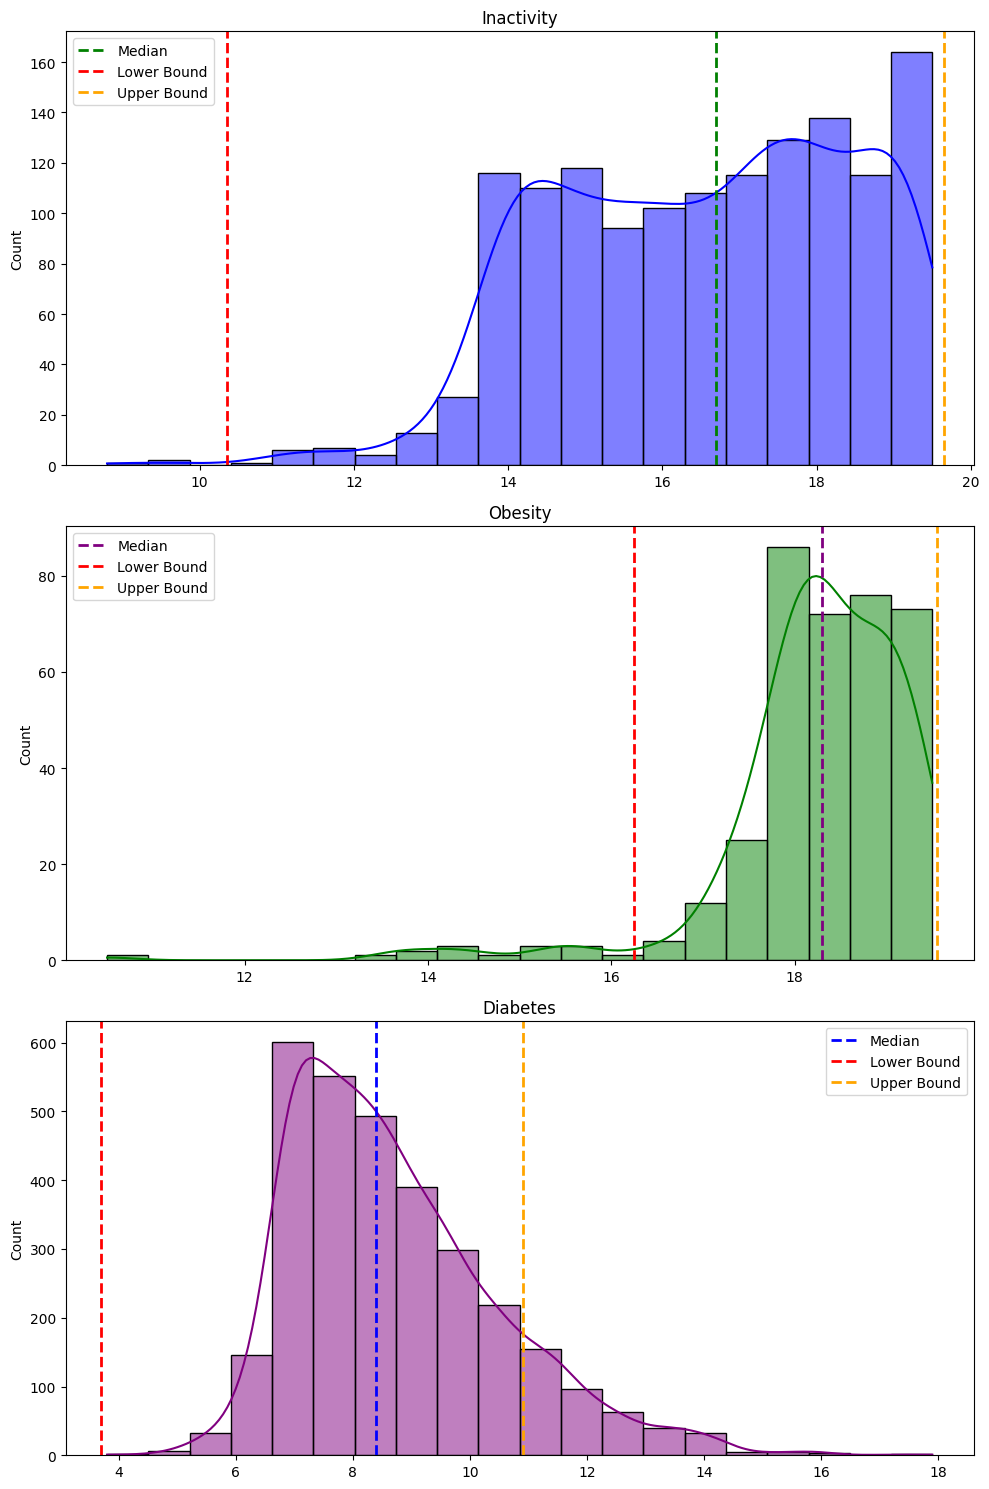

In [119]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot histograms with KDE for inactivity
sns.histplot(inac_data, bins=20, kde=True, color='blue', ax=axes[0])
axes[0].axvline(median_inac, color='green', linestyle='dashed', linewidth=2, label='Median')
axes[0].axvline(lower_bound_inac, color='red', linestyle='dashed', linewidth=2, label='Lower Bound')
axes[0].axvline(upper_bound_inac, color='orange', linestyle='dashed', linewidth=2, label='Upper Bound')
axes[0].set_title('Inactivity')
axes[0].legend()

# Plot histograms with KDE for obesity
sns.histplot(obes_data, bins=20, kde=True, color='green', ax=axes[1])
axes[1].axvline(median_obes, color='purple', linestyle='dashed', linewidth=2, label='Median')
axes[1].axvline(lower_bound_obes, color='red', linestyle='dashed', linewidth=2, label='Lower Bound')
axes[1].axvline(upper_bound_obes, color='orange', linestyle='dashed', linewidth=2, label='Upper Bound')
axes[1].set_title('Obesity')
axes[1].legend()

# Plot histograms with KDE for diabetes
sns.histplot(diab_data, bins=20, kde=True, color='purple', ax=axes[2])
axes[2].axvline(median_diab, color='blue', linestyle='dashed', linewidth=2, label='Median')
axes[2].axvline(lower_bound_diab, color='red', linestyle='dashed', linewidth=2, label='Lower Bound')
axes[2].axvline(upper_bound_diab, color='orange', linestyle='dashed', linewidth=2, label='Upper Bound')
axes[2].set_title('Diabetes')
axes[2].legend()

# Display the plots
plt.tight_layout()
plt.show()

In [120]:
font_size_text = "<h2>Removing outliers from common data</h2>"
display(Markdown(font_size_text))

<h2>Removing outliers from common data</h2>

In [121]:
inac_column = dataset.iloc[:, 1]  # Extracting the inactivity percentage column
obes_column = dataset.iloc[:, 2]
diab_column = dataset.iloc[:, 3]
# Find outliers indices
outliers_inac = (inac_column < lower_bound_inac) | (inac_column > upper_bound_inac)
outliers_obes = (obes_column < lower_bound_obes) | (obes_column > upper_bound_obes)
outliers_diab = (diab_column < lower_bound_diab) | (diab_column > upper_bound_diab)

all_outliers = outliers_inac | outliers_obes | outliers_diab
# Remove outliers
filtered_dataset = dataset.loc[~all_outliers]
filtered_dataset

,FIPS,% INACTIVE,% OBESE,% DIABETIC
0,1011,17.0,18.7,9.4
1,2068,16.2,18.9,6.8
2,2105,15.0,19.4,7.3
3,2195,17.8,17.2,9.2
4,2230,15.8,18.3,6.6
...,...,...,...,...
348,51181,15.7,19.0,7.9
349,51820,16.6,19.5,8.6
350,51830,15.7,18.0,8.5
351,51840,16.1,19.4,6.9


In [122]:
# X = filtered_dataset.iloc[:, 1:-1].values
# y = filtered_dataset.iloc[:, -1].values

X = filtered_dataset.iloc[:, 1:-1].values
X[:, 1] = np.sqrt(X[:, 1])
y = np.log(filtered_dataset.iloc[:, -1].values)
X

array([[17.  ,  4.32],
       [16.2 ,  4.35],
       [15.  ,  4.4 ],
       [17.8 ,  4.15],
       [15.8 ,  4.28],
       [16.8 ,  4.36],
       [14.3 ,  4.25],
       [15.4 ,  4.25],
       [12.5 ,  4.06],
       [13.3 ,  4.14],
       [13.8 ,  4.31],
       [12.3 ,  4.35],
       [14.2 ,  4.25],
       [11.6 ,  4.17],
       [14.1 ,  4.24],
       [11.7 ,  4.3 ],
       [14.4 ,  4.32],
       [14.8 ,  4.25],
       [15.9 ,  4.25],
       [13.1 ,  4.34],
       [13.6 ,  4.07],
       [12.9 ,  4.23],
       [14.5 ,  4.3 ],
       [14.1 ,  4.22],
       [14.3 ,  4.38],
       [13.3 ,  4.27],
       [13.3 ,  4.35],
       [13.  ,  4.17],
       [17.4 ,  4.37],
       [14.6 ,  4.14],
       [15.5 ,  4.14],
       [13.6 ,  4.22],
       [12.6 ,  4.15],
       [16.1 ,  4.28],
       [16.3 ,  4.28],
       [15.7 ,  4.29],
       [17.5 ,  4.35],
       [18.4 ,  4.4 ],
       [15.3 ,  4.23],
       [15.1 ,  4.3 ],
       [15.2 ,  4.31],
       [16.2 ,  4.37],
       [16.9 ,  4.39],
       [14.

In [56]:
from scipy.stats import pearsonr

correlation_coefficient, p_value = pearsonr(dataset['% INACTIVE'], y)
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")


Correlation Coefficient: 0.5671037350564148
P-value: 1.6326985821570714e-31


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [17]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [36]:
print("Intercept:", regressor.intercept_)
print("Coefficient for Inactivity (B1):", regressor.coef_[0])
print("Coefficient for Obesity (B2):", regressor.coef_[1])

Intercept: 1.7026414354405093
Coefficient for Inactivity (B1): 0.23778887846349625
Coefficient for Obesity (B2): 0.1024931241432882


In [18]:
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)
np.set_printoptions(precision=2)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

Text(0.5, 1.0, 'Actual vs Predicted Diabetes Percentage (Training Data)')

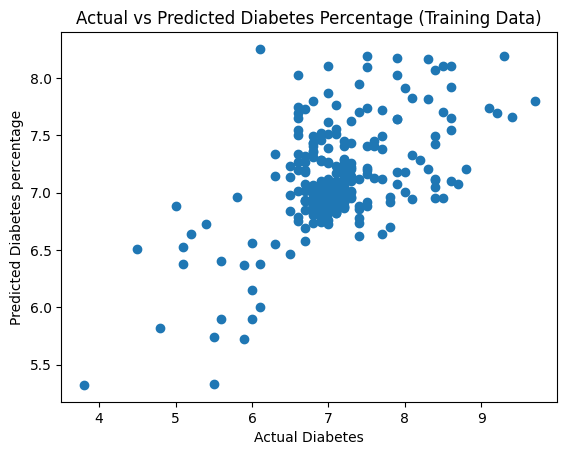

In [19]:
import matplotlib.pyplot as plt

plt.scatter(y_train, y_pred_train)
plt.xlabel("Actual Diabetes")
plt.ylabel("Predicted Diabetes percentage")
plt.title("Actual vs Predicted Diabetes Percentage (Training Data)")

In [20]:
from sklearn.metrics import r2_score
r2_score(y_train, y_pred_train)

0.3465457795941539

Text(0.5, 1.0, 'Actual vs Predicted Diabetes Percentage (Testing Data)')

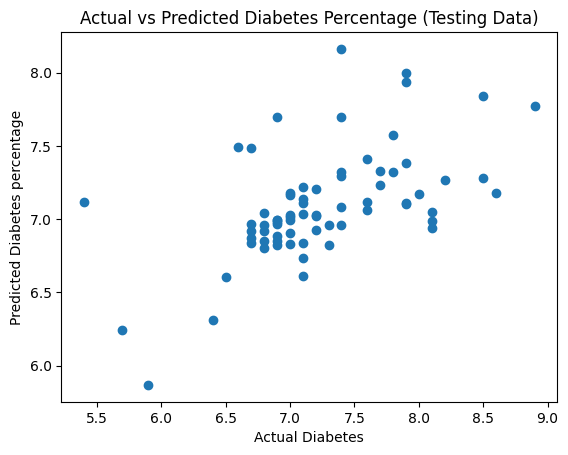

In [21]:
plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual Diabetes")
plt.ylabel("Predicted Diabetes percentage")
plt.title("Actual vs Predicted Diabetes Percentage (Testing Data)")

In [22]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_test)

0.2657124330563633

/Users/snehsuresh/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/snehsuresh/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


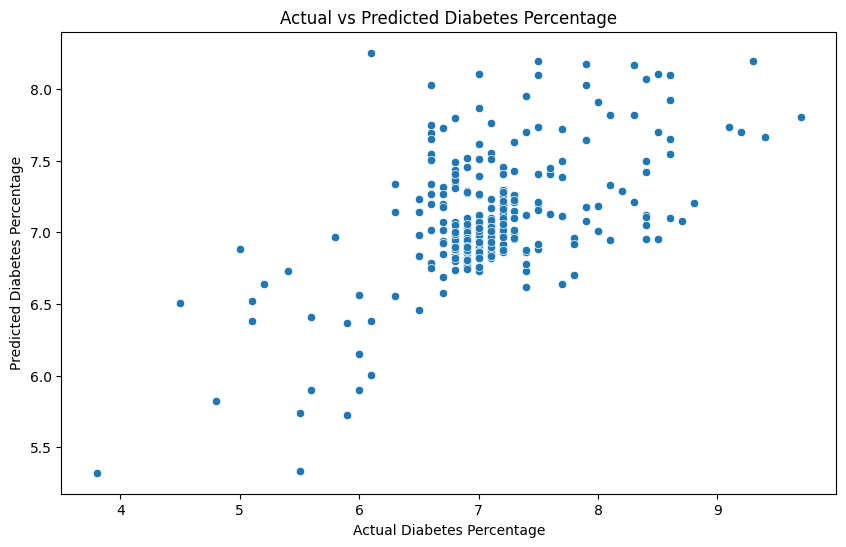

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_train, y=y_pred_train)
plt.title('Actual vs Predicted Diabetes Percentage')
plt.xlabel('Actual Diabetes Percentage')
plt.ylabel('Predicted Diabetes Percentage')
plt.show()

/Users/snehsuresh/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/snehsuresh/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


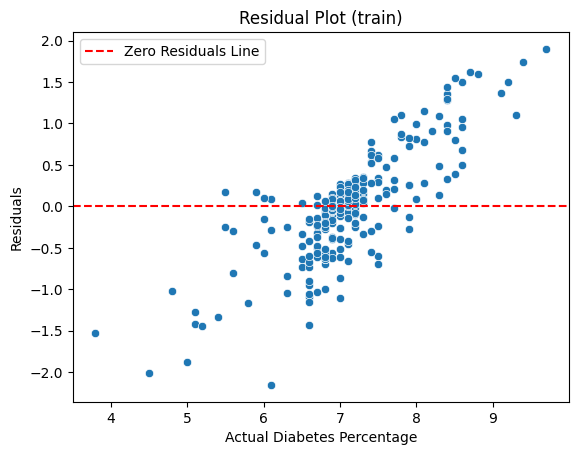

In [26]:
residuals_train = y_train - y_pred_train
sns.scatterplot(x=y_train, y=residuals_train)
plt.axhline(y=0, color='r', linestyle='--', label='Zero Residuals Line')
plt.title('Residual Plot (train)')
plt.xlabel('Actual Diabetes Percentage')
plt.ylabel('Residuals')
plt.legend()
plt.show()

In [77]:
from sklearn.metrics import mean_squared_error

# Standardize residuals
residuals_train_std = residuals_train / np.sqrt(mean_squared_error(y_train, y_pred_train))


In [92]:
from scipy.stats import zscore

z_scores = zscore(residuals_train)
outliers = (np.abs(z_scores) > 1)

# Count of counties higher than expected
count_higher = np.sum(residuals_train_std > 1)

# Count of counties lower than expected
count_lower = np.sum(residuals_train_std < -1)

# Total count of counties
total_count = len(residuals_train_std)

# Proportion of counties higher than expected
proportion_higher = count_higher / total_count

# Proportion of counties lower than expected
proportion_lower = count_lower / total_count

print("Count of counties higher than expected:", count_higher)
print("Count of counties lower than expected:", count_lower)
print("Total count of counties:", total_count)
print("Proportion of counties higher than expected:", proportion_higher)
print("Proportion of counties lower than expected:", proportion_lower)

Count of counties higher than expected: 35
Count of counties lower than expected: 36
Total count of counties: 283
Proportion of counties higher than expected: 0.12367491166077739
Proportion of counties lower than expected: 0.127208480565371


In [98]:
# Assuming 'X_train' is a NumPy array and 'outliers' is a boolean array indicating outliers
outlier_indices = np.where(outliers)[0]

# Extract values for inactivity and obesity for outliers
inactivity_outliers = X_train[outlier_indices, 0]  # Assuming inactivity is the first column
obesity_outliers = X_train[outlier_indices, 1]     # Assuming obesity is the second column

# Display the values
print("Inactivity Values for Outliers:")
print(inactivity_outliers)

print("\nObesity Values for Outliers:")
print(obesity_outliers)


Inactivity Values for Outliers:
[13.  14.8 15.9 14.8 17.  15.5 10.7 16.5 16.2 16.6 15.9 19.1 14.2 17.5
 13.5 15.7 12.8 17.5 19.4 17.4 15.5 15.5 15.2 17.6 14.2 16.1 17.2 11.2
 17.2 13.4 14.6 15.8 15.7 14.9 15.6 18.4 17.8 14.9 13.5 12.9 15.2 15.1
 16.5 17.4 17.  13.8 16.6 14.5 15.3 16.9 17.5 11.9 15.3 14.8 16.1 15.5
 15.1 17.6 13.3 14.9 13.9 13.7 17.8 13.6 13.6 14.7 14.8 19.2 13.3 17.2
 18.7]

Obesity Values for Outliers:
[18.6 18.1 18.1 18.7 19.  17.7 10.5 19.4 18.9 19.5 19.  19.  18.2 18.9
 19.2 19.4 16.2 17.9 18.9 19.1 18.8 18.  17.6 17.2 17.6 19.4 18.9 14.2
 17.1 17.1 17.4 18.3 19.5 17.6 18.7 19.  17.2 18.9 15.7 15.7 19.2 18.7
 18.3 18.5 18.7 18.9 18.5 17.6 17.9 17.3 18.5 19.3 18.8 18.3 18.3 17.1
 17.7 19.3 18.2 17.2 19.1 17.3 19.4 18.  16.6 17.1 18.1 18.8 17.1 19.1
 19.1]


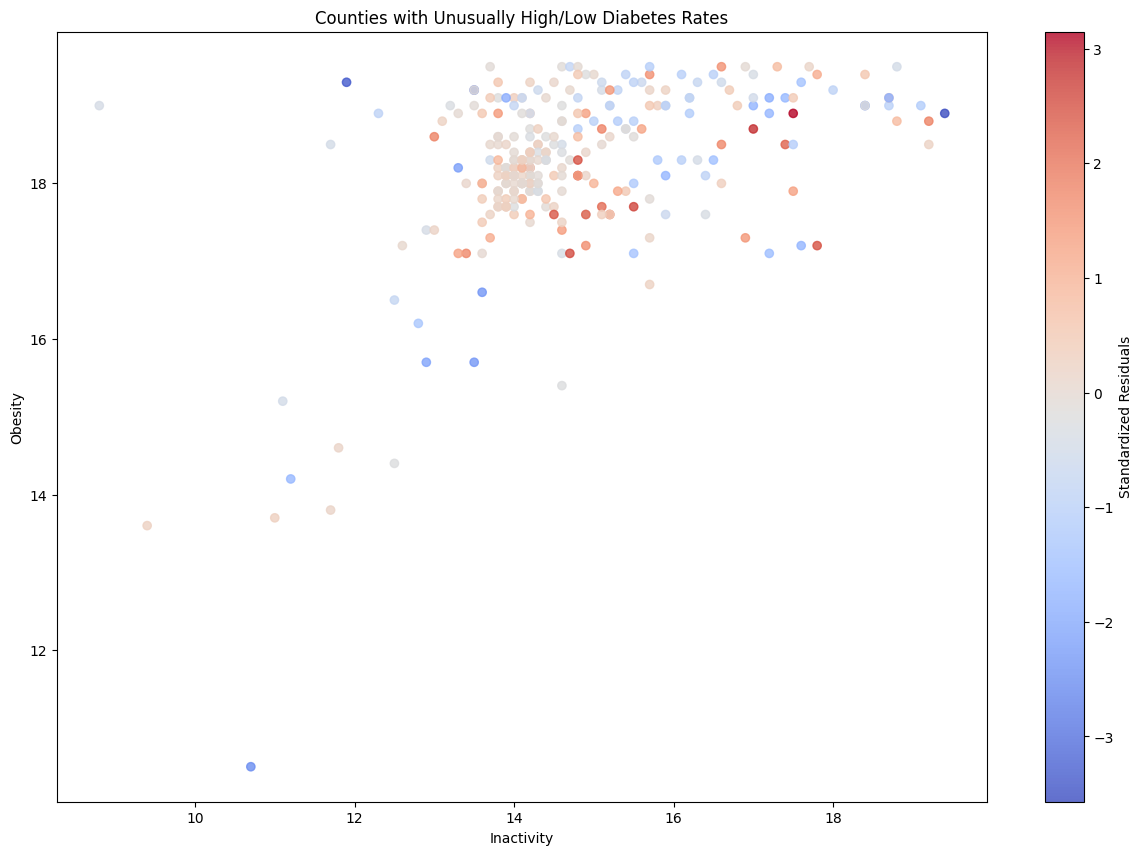

In [90]:
plt.figure(figsize=(15, 10))
plt.scatter(X_train[:, 0], X_train[:, 1], c=residuals_train_std, cmap='coolwarm', alpha=0.8)
plt.colorbar(label='Standardized Residuals')
plt.xlabel('Inactivity')
plt.ylabel('Obesity')
plt.title('Counties with Unusually High/Low Diabetes Rates')
plt.show()

/Users/snehsuresh/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/snehsuresh/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


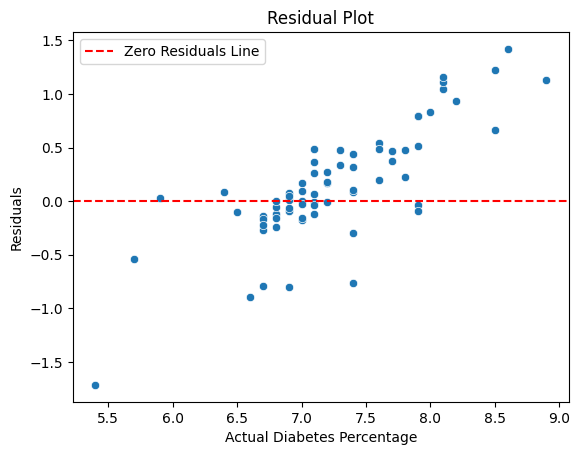

In [27]:
residuals = y_test - y_pred_test
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(y=0, color='r', linestyle='--', label='Zero Residuals Line')
plt.title('Residual Plot')
plt.xlabel('Actual Diabetes Percentage')
plt.ylabel('Residuals')
plt.legend()
plt.show()


In [28]:
squared_residuals = residuals_train**2

In [34]:
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm
# Add a constant term to X_train for the intercept
X_train_with_constant = sm.add_constant(X_train)

# Perform Breusch-Pagan test
_, p_value, _, _ = sm.stats.diagnostic.het_breuschpagan(squared_residuals, X_train_with_constant)

# Print the results
print("Breusch-Pagan Test Results:")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Heteroskedasticity detected (reject null hypothesis)")
else:
    print("No evidence of heteroskedasticity")

Breusch-Pagan Test Results:
P-value: 0.011803102323772647
Heteroskedasticity detected (reject null hypothesis)


In [29]:
from sklearn.linear_model import LinearRegression

# Assuming X_test contains the independent variables
squared_regressor = LinearRegression()
squared_regressor.fit(X_train, squared_residuals)

#Why are we testing if the squared residuals can be predicted by the independent variables?
# The Breusch-Pagan test tests the hypothesis that the variance of the errors (residuals) in a regression model is constant across all levels of the independent variables. In other words, it checks for homoskedasticity, which is one of the assumptions of classical linear regression.
#If the variance of the residuals is constant (homoskedasticity), it means that the spread of the residuals is the same across all values of the independent variables. This is a key assumption for the validity of OLS (Ordinary Least Squares) estimates and their associated statistical tests.

# Predict the squared residuals
squared_residuals_pred = squared_regressor.predict(X_train)


In [30]:
# Sure thing! Let's break it down:

# Percent-Point Function (PPF):
# The Percent-Point Function, also known as the inverse cumulative distribution function (CDF), helps you find a specific value in a probability distribution. Imagine you have a probability, and you want to know the corresponding value in your distribution. The PPF gives you that value.

# For example, let's say you have a normal distribution (bell curve) of test scores, and you know that a score is at the 80th percentile. You can use the PPF to find the test score that corresponds to this percentile.

# Cumulative Distribution Function (CDF):
# The Cumulative Distribution Function gives you the probability that a random variable takes a value less than or equal to a given point. It's like adding up all the probabilities of values up to a certain point.

# Continuing with the test score example, if you want to know the probability that a student scored below a certain score, you would use the CDF. It's a way of understanding the cumulative probability up to a specific value in your distribution.

# In simpler terms, PPF helps you find a value based on a probability, while CDF gives you the probability up to a certain value. They're both tools to understand and work with probability distributions.







In [31]:
from sklearn.metrics import mean_squared_error
from scipy.stats import chi2


# Null Hypothesis (H0): There is no heteroskedasticity; the variance of the residuals is constant.

# The alternative hypothesis (what you are testing for) would be:

# Alternative Hypothesis (H1): There is heteroskedasticity; the variance of the residuals is not constant.


test_statistic = len(X_test) * mean_squared_error(squared_residuals, squared_residuals_pred) / 2
# critical_value = chi2.ppf(0.95, df=1)

# if test_statistic > critical_value:
#     print("Heteroskedasticity detected (reject null hypothesis)")
# else:
#     print("No evidence of heteroskedasticity (fail to reject null hypothesis)")
    
# print(test_statistic)

# Calculate the p-value
p_value = 1 - chi2.cdf(test_statistic, df=1)

# Significance level (alpha)
alpha = 0.05

# Compare p-value to significance level
if p_value <= alpha:
    print(f"Heteroskedasticity detected (reject null hypothesis) with p-value: {p_value}")
else:
    print(f"No evidence of heteroskedasticity (fail to reject null hypothesis) with p-value: {p_value}")

print("Test Statistic:", test_statistic)


Heteroskedasticity detected (reject null hypothesis) with p-value: 5.727195521210149e-05
Test Statistic: 16.19078779632717


In [228]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cross_val_r2 = cross_val_score(regressor, X_train, y_train, cv=5, scoring='r2')
cross_val_r2

array([0.46, 0.17, 0.28, 0.33, 0.31])

In [229]:
cv_range = np.max(cross_val_r2) - np.min(cross_val_r2)
print("Range of R-squared: ", cv_range)
cv_std = np.std(cross_val_r2)
print("Standard Deviation of R-squared: ", cv_std)
q75, q25 = np.percentile(cross_val_r2, [75 ,25])
cv_iqr = q75 - q25
print("Interquartile Range of R-squared: ", cv_iqr)


Range of R-squared:  0.2924070839879689
Standard Deviation of R-squared:  0.0940412889655816
Interquartile Range of R-squared:  0.05280956747528154


In [ ]:
# If the range, standard deviation, or IQR is relatively small, it suggests that the model's performance is consistent across different folds.
# If the range, standard deviation, or IQR is large, it indicates a higher variance in performance, and the model may be sensitive to the choice of training data.